# Pipelines de procesamiento para variables numéricas

Primero, empezaremos hablando de los pipelines para variables numéricas. Más adelante, en este mismo notebook, se abarcarán las variables categóricas.

## Escalamiento lineal

**¿Por qué usarlos?**

-> Modelos de machine laerning eficientes en el rango [-1,1]

**¿Hay diferentes tipos?**

-> max-min, Clipping, Z-score, Winsorizing, etc.

**¿Cuándo usarlos?**

-> Data simétrica o uniformemente distribuida

Para optimizar el desempeño de nuestro modelo de Machine Learning, es preferible que se obtimicen los datos dentro de del rango comunmente utilizado [-1, 1]. Para eso, hay diferentes tipos de transformación:

### min-max 

$$ x \xrightarrow{\text{Transformación}} x_s $$

donde: 

$$ x_s=\frac{2x-min-max}{max-min} $$


![Picture title](image-20220301-153734.png)

### Clipping

Este método no es muy recomendado trabajar con este método. 
La distribución es recortada entre dos límites (inferior y superior). Los datos que se encuentran dentro del rango no sufrirán ninguna transformación. Sin embargo, los que se encuentran fuera de estos límites serán "colapsados", es decir, serán forzados a que se encuentren dentro del rango establecido por los límites. 

Estos límites se pueden establecer de forma arbitraria o en base a los percentiles (**método de Winsorizing**).


![Picture title](image-20220301-153850.png)

### Z-score

Basado en la definición de promedio y desviación estándar

Tenemos un conjunto de datos y le calculamos el promedio y la desviación estándar. Asumimos que tiene una distribución simétrica (Gaussiana).

$$ {x_1, ..., x_n} \rightarrow \mu, \sigma$$

Entonces, la transformación que se aplica en este método es el siguiente:

$$ x_s=\frac{x-\mu}{\sigma}$$

La nueva distribución tendrá una forma Gaussiana con $\mu=0$ y $\sigma=1$, para ajustarlo al rango [-1,1].


![Picture title](image-20220301-155908.png)

## Trasnsformación no lineal

**¿Por qué usarlos?**

-> Datos fuertemente sesgados, no simétricos

**¿Hay diferentes tipos?**

-> Logaritmos, sigmoides, polinomiales, etc.

**¿Cuándo usarlos?**

-> ¡Antes de escalamientos lineales!

### Tangente hiperbólica

Es una función con un rango [-1, 1], descrita matemáticamente como:

$$x_s=\tanh(x) $$

Emplear esta función tiene muchas ventajas. Por ejemplo, los outilers que son mapeados con una tangente hiperbólica tendrán un intérvalo más pequeño. Como resultado, se tendrá una distribución menos sesgada y simétrica.

De igual manera, para calibrar la distribución se emplea un parámetro $a$, de tal forma que

$$x_s=\tanh(\frac{x}{a})$$


![Picture title](image-20220301-183731.png)

### Raíz cuadrada

De acuerdo a la curva $y=\sqrt x$, se tendrá un intervalo para outliers más pequeño que el original, además de que se encuentran menos distantes del grueso de la distribución original.


![Picture title](image-20220301-184123.png)

## Procesamiento de datos numéricos en Python

### Transformaciones lineales

In [ ]:
import timeit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model

X, y = datasets.load_diabetes(return_X_y=True)
raw = X[:, None, 2]  # Transformación en las dimensiones

(array([32., 66., 98., 90., 64., 50., 23., 12.,  5.,  2.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

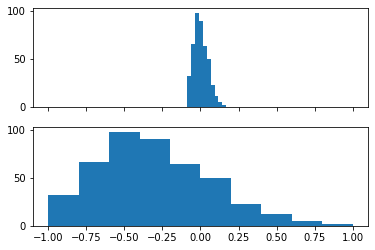

In [ ]:
# Reglas de escalamiento
max_raw = max(raw)
min_raw = min(raw)
scaled = (2*raw - max_raw - min_raw) / (max_raw - min_raw)

fig, axs = plt.subplots(2, 1, sharex = True)
axs[0].hist(raw)
axs[1].hist(scaled)

In [ ]:
# Modelos para entrenamiento
def train_raw():
    linear_model.LinearRegression().fit(raw, y)

def train_scaled():
    linear_model.LinearRegression().fit(scaled, y)

In [ ]:
raw_time = timeit.timeit(train_raw, number = 100)
scaled_time = timeit.timeit(train_scaled, number = 100)

print(f'''train raw: {raw_time}
train scaled: {scaled_time}''')


train raw: 0.05115496600046754
train scaled: 0.04325347800113377


* Max-min scaling: mejor para datos uniformemente distribuidos
* z-score scaling: mejor para datos distribuidos "normalmente" (forma de campana de Gauss)

### Transformaciones no lineales

In [ ]:
df = pd.read_csv('cars.csv')

<AxesSubplot:>

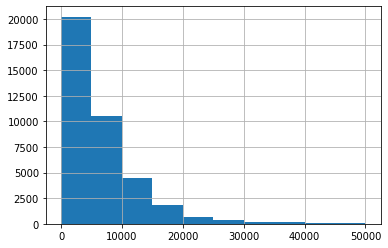

In [ ]:
df.price_usd.hist()

In [ ]:
# Este bloque es solo como información, aquí se calcularon la frecuencia del precio dividido en 10 bins
binnedPrice = pd.cut(df['price_usd'], 10)
binnedPrice.value_counts()

(-48.999, 5000.9]     20218
(5000.9, 10000.8]     10523
(10000.8, 15000.7]     4432
(15000.7, 20000.6]     1821
(20000.6, 25000.5]      694
(25000.5, 30000.4]      377
(35000.3, 40000.2]      177
(30000.4, 35000.3]      168
(40000.2, 45000.1]       68
(45000.1, 50000.0]       53
Name: price_usd, dtype: int64

#### Trasnformación con tanh

<AxesSubplot:>

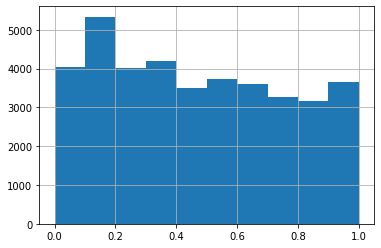

In [ ]:
a = 10000  # Para calibrar
df.price_usd.apply(lambda x: np.tanh(x/a)).hist()

#podemos observar que obtuvimos una distribución uniforme

# Pipelines de procesamiento para variables categóricas

## Mapeos numéricos

**Dummy**

-> Representación compacta
-> Mejor para inputs linealmente independientes

**One-hot**

-> Permite describir categorías no incluidas inicialmente

### Dummy

Es una representación compacta. Sin embargo, con este encoding no hay manera de representar valores nulos "nan".

### One hot

Se tienen dimensiones de acuerdo a la cantidad de categorías. Aquí sí hay representación de valores "nan".


![Picture title](image-20220302-132333.png)

## Procesamiento para variables categóricas con Python

In [ ]:
# Empleando pandas
import pandas as pd

df = pd.read_csv('cars.csv')

In [ ]:
pd.get_dummies(df['engine_type'])

,diesel,electric,gasoline
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
38526,0,0,1
38527,1,0,0
38528,0,0,1
38529,0,0,1


In [ ]:
# Empleando sklearn
import sklearn.preprocessing as preprocessing
encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')

In [ ]:
encoder.fit(df[['engine_type']].values)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
encoder.transform([['gasoline'],['diesel'],['aceite']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [ ]:
encoder.fit(df[['year_produced']].values)

OneHotEncoder(handle_unknown='ignore')

In [ ]:
encoder.transform([[2016],[2009],[1990]]).toarray()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

La desventaja del one-hot es que cada elemento de los vectores resultantes es como si fueran nuevas variables, por ende, esto aumenta la dimensionalidad de nuestro dataset y se vea afectado el rendimiento.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2f24a598-9a01-4bdb-9cd6-2158968b044c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>